In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diamonds/diamonds.csv


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
diamonds = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Some features of interest for predicting price may be carat, depth, and table. Let's create scatterplots to examine the associations between these variables

Text(0.5, 1.0, 'Price($) vs. carat for Individual Diamonds')

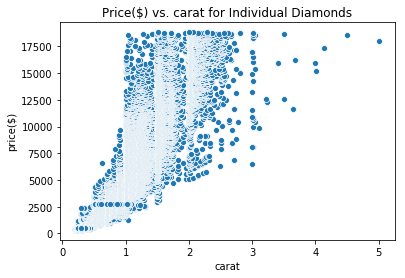

In [9]:
sns.scatterplot(diamonds['carat'], diamonds['price'], data = diamonds)
plt.ylabel('price($)')
plt.title('Price($) vs. carat for Individual Diamonds')

There is a positive association between the explanatory variable(carat) and the price of the diamond in dollars. There is heteroskedacity which is the inconsistency of variability of points on the scatterplot. For lower values of carat, there isn't too much variability of prices. However, as the number of carats increases, the variability of prices increases. A linear model can fit this data, however, the trend doesn't appear to be completely linear, and is somewhat quadratic.

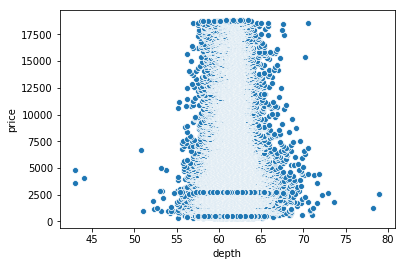

In [7]:
sns.scatterplot(diamonds['depth'], diamonds['price'], data = diamonds)

There is a no association between the explanatory variable(depth) and the price of the diamond in dollars.

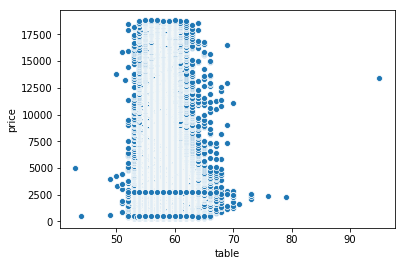

In [8]:
sns.scatterplot(diamonds['table'], diamonds['price'], data = diamonds)

There is a no association between the explanatory variable(table) and the price of the diamond in dollars.

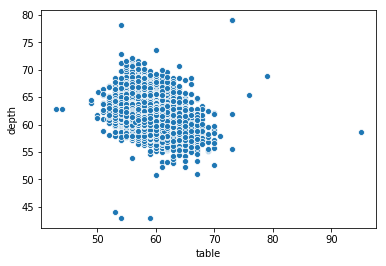

In [12]:
sns.scatterplot(diamonds['table'], diamonds['depth'], data = diamonds)

There appears to be a moderate negative linear association between the explanatory variable(depth) and the price of the diamond in dollars. Essentially, as the table increases, the depth tends to decrease.

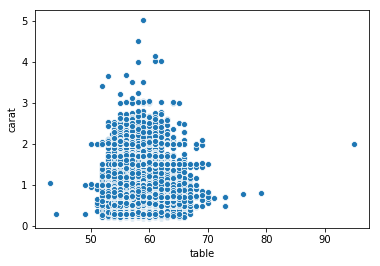

In [13]:
sns.scatterplot(diamonds['table'], diamonds['carat'], data = diamonds)

There is a no association between the explanatory variable(table) and carat.

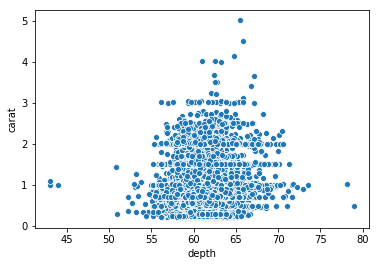

In [14]:
sns.scatterplot(diamonds['depth'], diamonds['carat'], data = diamonds)

There is a positive association between the explanatory variable(depth) and the carats of the diamond. There is heteroskedacity which is the inconsistency of variability of points on the scatterplot. For lower values of depth, there isn't too much variability of prices. However, as the depth increases, the variability of carat increases. A linear model can fit this data, as the trend appears to be linear.

Linear Regression to Predict Price of Diamonds based on depth and carat. 

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = diamonds[['depth', 'carat', 'x', 'y', 'z', 'table']] #Increasing the number of features for predicting quantitative continuous values increases precision.
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
np.sqrt(reg.score(X_train, y_train)) #The correlation coefficient(A strong linear association between depth and carat features and the price)

0.9269625535318617

In [46]:
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X_test)
mean_absolute_error(y_test, y_pred) #Evaluating the performance of the test data.
np.abs(reg.predict(np.array([[62.8, 0.70, 5.66, 5.68, 3.56, 60]])))
np.abs(reg.predict(np.array([[61.5, 0.23, 3.95, 3.98, 2.43, 55]])))

array([342.48602209])

There is a strong positive linear association between depth, carat, x, y, z measurements, and table which are the predictors(features) and the price, which is the label. This is incidated with the high r-value of 0.922 which measures how tightly clustered the points are around the linear regression line. Thus, this linear regression model is able to reliably predict the price of individual diamonds based on their depth and carat features respectively.